# VINCULACIÓN BASE FINAL


In [ ]:
# prompt: mostrar la version de python

import sys
sys.version


'3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]'

In [ ]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Para cuando se ejecuta desde google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Para cuando se carga desde el usuario de Angie Vela
df= pd.read_excel("drive/My Drive/Proyecto de Profundización II/Base_bruta_v7.xlsx")

In [ ]:
# Para cuando se carga desde el usuario de Cristian Borrero
###df= pd.read_excel("drive/My Drive/Base_bruta_v6.xlsx")

## Seleccion de las variables para el modelado de Cluster:

La seleccion de las variables relevantes se realizo por medio de la importancia de caracteristicas de los modelos supervisados desarrollados anteriormente

In [ ]:
# Ajustar los nombres de las columnas basadas en las columnas disponibles
variables= [
    'Pago_Digital','Uso_tecno_finan', 'Frec_uso_internet', 'Lugar_transferencia', 'Rango_edad',
    'Nivel_educativo', 'Metodo_uso_internet', 'Percepcion_facilidad_PSE', 'Ubicación_cuenta_AH', 'Cuenta_Ahorro','Percepcion_facilidad_Efectivo',
    'Rango_ingresos', 'Percepcion_costos_monederos','Frecuencia_Ingresos','Fuente_Ingresos', 'Satisfaccion_APPS_finan','Percepcion_riesgo_pago_Efectivo',
    'Rango_gastos', 'Percepcion_riesgo_pago_PSE','Percepcion_costos_PSE',
    'Percepcion_costos_Efectivo','Satisfaccion_web_finan','EstratoIMP','Uso_efectivo_mes','Entidad_queja','Percepcion_riesgo_Monedero', 'REGIÓN'
]

In [ ]:
df_2 = df[variables].copy()

In [ ]:
df_2.head()

,Pago_Digital,Uso_tecno_finan,Frec_uso_internet,Lugar_transferencia,Rango_edad,Nivel_educativo,Metodo_uso_internet,Percepcion_facilidad_PSE,Ubicación_cuenta_AH,Cuenta_Ahorro,...,Rango_gastos,Percepcion_riesgo_pago_PSE,Percepcion_costos_PSE,Percepcion_costos_Efectivo,Satisfaccion_web_finan,EstratoIMP,Uso_efectivo_mes,Entidad_queja,Percepcion_riesgo_Monedero,REGIÓN
0,SÍ,No,Una vez al mes,Ninguna de las anteriores,26-35,Secundaria,Plan de datos móviles (conexión móvil),1,No tiene Cuenta AH,NO,...,>1.000.001 < 1.500.000,6,1,1,1,1,Sí,No se ha quejado,1,Eje cafetero
1,SÍ,No,Varias veces al día,Empresa de giros,46-55,Primaria,Plan de datos móviles (conexión móvil),6,No tiene Cuenta AH,NO,...,> 250.001 < 500.000,1,3,3,1,1,Sí,No se ha quejado,3,Eje cafetero
2,NO,No,No usa internet,Cajero automático,> 56,Primaria,Sin internet,1,No tiene Cuenta AH,NO,...,> 500.001 < 750.000,1,6,6,1,1,Sí,No se ha quejado,1,Eje cafetero
3,NO,Sí,Varias veces a la semana,Ninguna de las anteriores,36-45,Secundaria,Modem (conexión fija),6,No tiene Cuenta AH,NO,...,> 500.001 < 750.000,5,6,5,6,2,No,No se ha quejado,5,Centro Oriente
4,SÍ,No,Cada hora,Corresponsal bancario,26-35,Tecnólogos,WIFI,6,Bancos o entidades financieras,SÍ,...,> 5.000.000,1,1,1,1,4,Sí,Otro,1,Pacífico


In [ ]:
# prompt: Convertir la variables int en tipo object

# Convertir las variables int a tipo object
for column in df_2.columns:
  if pd.api.types.is_integer_dtype(df_2[column]):
    df_2[column] = df_2[column].astype(object)

# Verificar los tipos de datos de las columnas
df_2.dtypes

,0
Pago_Digital,object
Uso_tecno_finan,object
Frec_uso_internet,object
Lugar_transferencia,object
Rango_edad,object
Nivel_educativo,object
Metodo_uso_internet,object
Percepcion_facilidad_PSE,object
Ubicación_cuenta_AH,object
Cuenta_Ahorro,object


## Division de Dataset Usuarios y No usarios PAGOS DIGITALES


In [ ]:
df_usuarios = df_2[df_2['Pago_Digital'] == 'SÍ']
df_no_usuarios = df_2[df_2['Pago_Digital'] == 'NO']

In [ ]:
# prompt: cuantas filas tiene df_no_usuarios

print(f"df_no_usuarios tiene {df_no_usuarios.shape[0]} filas.")

df_no_usuarios tiene 2628 filas.


In [ ]:
df_usuarios.dtypes

,0
Pago_Digital,object
Uso_tecno_finan,object
Frec_uso_internet,object
Lugar_transferencia,object
Rango_edad,object
Nivel_educativo,object
Metodo_uso_internet,object
Percepcion_facilidad_PSE,object
Ubicación_cuenta_AH,object
Cuenta_Ahorro,object


In [ ]:
df_usuarios = df_usuarios.drop(['Pago_Digital'], axis=1)
df_no_usuarios = df_no_usuarios.drop(['Pago_Digital'], axis=1)

# SEGMENTACION USUARIOS QUE SI USAN MEDIOS DE PAGOS DIGITALES

##Modelado Cluster

In [ ]:
pip install kmodes

In [ ]:
from kmodes.kmodes import KModes
from itertools import combinations
from sklearn.metrics import silhouette_score

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 42498.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 435, cost: 38435.0
Run 1, iteration: 2/100, moves: 85, cost: 38435.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 474, cost: 37260.0
Run 1, iteration: 2/100, moves: 116, cost: 37260.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 554, cost: 36889.0
Run 1, iteration: 2/100, moves: 221, cost: 36796.0
Run 1, iteration: 3/10

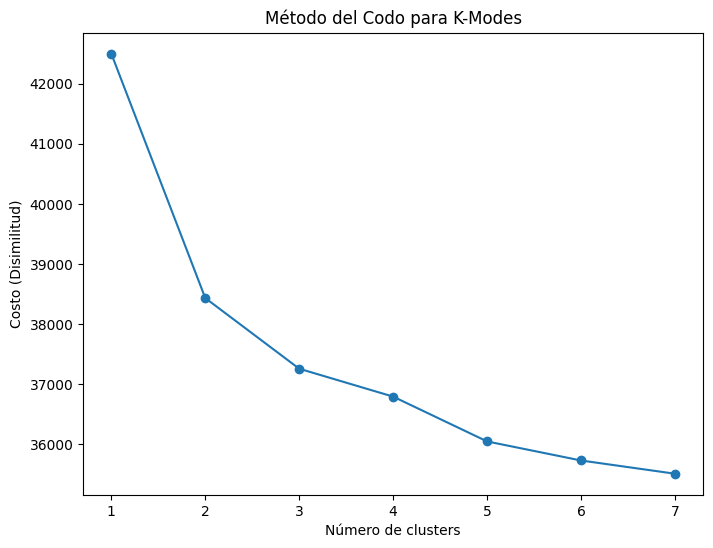

In [ ]:
# Método del Codo
costs = []
K = range(1, 8)

for num_clusters in K:
    kmodes = KModes(n_clusters=num_clusters, init='Cao', n_init=5, verbose=1)
    kmodes.fit_predict(df_usuarios)
    costs.append(kmodes.cost_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(K, costs, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Costo (Disimilitud)')
plt.title('Método del Codo para K-Modes')
plt.show()

In [ ]:

k=3
# Initialize the KModes model with the desired number of clusters
kmodes_model  = KModes(n_clusters=k, init='Cao', n_init=10, verbose=1, random_state=42)

# Fit the model to your data
clusters = kmodes_model.fit_predict(df_usuarios)

# Costo del modelo (disimilitud total)
print(f"Costo del modelo: {kmodes.cost_}")

# Add the cluster labels to your DataFrame
df_usuarios['Cluster'] = clusters

# Print the cluster centroids
print(kmodes_model.cluster_centroids_)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 451, cost: 37040.0
Run 1, iteration: 2/100, moves: 40, cost: 37040.0
Costo del modelo: 12518.0
[['No' 'Varias veces al día' 'Corresponsal bancario' '18-25' 'Secundaria'
  'WIFI' '1' 'No tiene Cuenta AH' 'NO' '6' '> 750.001 < 1.000.000' '1'
  'Irregulares' 'Otros no identificados' '1' '1' '> 500.001 < 750.000'
  '1' '1' '1' '1' '2' 'Sí' 'No se ha quejado' '1' 'Centro Oriente' '0']
 ['Sí' 'Varias veces al día' 'Cajero automático' '18-25' 'Técnico' 'WIFI'
  '6' 'Bancos o entidades financieras' 'SÍ' '6' '> 750.001 < 1.000.000'
  '1' 'Mensual' 'Salarios' '4' '1' '> 750.001 < 1.000.000' '6' '1' '1'
  '1' '1' 'Sí' 'No se ha quejado' '1' 'Caribe' '1']
 ['No' 'Varias veces al día' 'Corresponsal bancario' '26-35'
  'Universitarios' 'WIFI' '5' 'Bancos o entidades financieras' 'SÍ' '6'
  '> 1.000.001 < 1.500.000'

In [ ]:
# prompt: codigo para descargar la base df_usuarios con el cluster

from google.colab import files

# Suponiendo que df_usuarios ya está definido
df_usuarios.to_csv('df_usuarios.csv', encoding='utf-8-sig')
files.download('df_usuarios.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Metricas

### Grafico de la silueta

In [ ]:
digital_encoded = df_usuarios.apply(lambda x: pd.factorize(x)[0])


digital_silhouette = silhouette_score(digital_encoded, clusters, metric='hamming')
print(f"El coeficiente de silueta promedio es: {digital_silhouette}")


El coeficiente de silueta promedio es: 0.1085382332706079


In [ ]:
# Función para calcular la distancia de coincidencia simple
def simple_matching_distance(row1, row2):
    return sum(row1 != row2)

# Calcular la cohesión intra-cluster
intra_cluster_distances = []
for cluster in range(k):
    cluster_data = df_usuarios[df_usuarios['Cluster'] == cluster].drop(columns=['Cluster'])
    mode = cluster_data.mode().iloc[0]  # Modo del cluster
    distances = cluster_data.apply(lambda row: simple_matching_distance(row, mode), axis=1)
    intra_cluster_distances.append(distances.mean())

# Promedio de cohesión para todos los clusters
average_intra_cluster_distance = sum(intra_cluster_distances) / k
print("Cohesión promedio intra-cluster:", average_intra_cluster_distance)

Cohesión promedio intra-cluster: 12.388531960625455


In [ ]:


# Calcular la distancia de coincidencia simple entre modos de clusters
inter_cluster_distances = []
modes = [df_usuarios[df_usuarios['Cluster'] == cluster].drop(columns=['Cluster']).mode().iloc[0] for cluster in range(k)]

for mode1, mode2 in combinations(modes, 2):
    distance = simple_matching_distance(mode1, mode2)
    inter_cluster_distances.append(distance)

# Promedio de separación inter-cluster
average_inter_cluster_distance = sum(inter_cluster_distances) / len(inter_cluster_distances)
print("Separación promedio inter-cluster:", average_inter_cluster_distance)

Separación promedio inter-cluster: 12.333333333333334


### Entropia

In [ ]:
import pandas as pd
import numpy as np

# Asumiendo que 'df_usuarios' es tu DataFrame y ya contiene la columna 'Cluster'
# df_usuarios = pd.read_csv('ruta_a_tu_archivo.csv')  # Descomenta y ajusta si necesitas cargar tus datos

# Función para calcular la entropía de un clúster para todas las columnas categóricas
def calculate_total_entropy(df, cluster_label):
    cluster_data = df[df['Cluster'] == cluster_label]
    total_entropy = 0
    # Considerar todas las columnas excepto 'Cluster' y otras no categóricas que puedas tener
    for column in df.columns.drop(['Cluster']):
        counts = cluster_data[column].value_counts(normalize=True)
        entropy = -np.sum(counts * np.log2(counts + np.finfo(float).eps))  # Evitar log(0)
        total_entropy += entropy  # Sumar la entropía de cada columna para obtener la entropía total del clúster
    return total_entropy

# Calcular la entropía para cada clúster y almacenar los resultados
cluster_entropies = {}
clusters = df_usuarios['Cluster'].unique()
for cluster in clusters:
    cluster_entropies[cluster] = calculate_total_entropy(df_usuarios, cluster)

# Imprimir la entropía de cada clúster
for cluster, entropy in cluster_entropies.items():
    print(f"Entropía del Clúster {cluster}: {entropy}")


Entropía del Clúster 0: 49.435125391392674
Entropía del Clúster 2: 47.73721382604962
Entropía del Clúster 1: 48.89110790050535


In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def dunn_index(df, labels):
    unique_clusters = np.unique(labels)
    min_intercluster_distance = np.inf
    max_intracluster_distance = 0

    # Crear una matriz de distancia para todo el DataFrame
    # Conversión de datos categóricos a numéricos para el cálculo de la distancia
    distance_matrix = squareform(pdist(digital_encoded, metric='hamming'))

    for i in unique_clusters:
        for j in unique_clusters:
            if i != j:
                # Distancia mínima interclúster
                inter_distances = distance_matrix[np.ix_(df['Cluster'] == i, df['Cluster'] == j)]
                min_intercluster_distance = min(min_intercluster_distance, np.min(inter_distances))

        # Distancia máxima intraclúster
        intra_distances = distance_matrix[np.ix_(df['Cluster'] == i, df['Cluster'] == i)]
        max_intracluster_distance = max(max_intracluster_distance, np.max(intra_distances))

    # Cálculo del índice de Dunn
    dunn = min_intercluster_distance / max_intracluster_distance
    return dunn

# Calcula el índice de Dunn
dunn_score = dunn_index(df_usuarios, df_usuarios['Cluster'].values)
print(f"Índice de Dunn: {dunn_score}")


Índice de Dunn: 0.23076923076923078


### Analisis cluster

In [ ]:
# Analizar la moda de las variables por cluster
cluster_summary = df_usuarios.groupby('Cluster').agg(lambda x: x.mode()[0])
print(cluster_summary)

        Uso_tecno_finan    Frec_uso_internet    Lugar_transferencia  \
Cluster                                                               
0                    No  Varias veces al día  Corresponsal bancario   
1                    Sí  Varias veces al día      Cajero automático   
2                    No  Varias veces al día  Corresponsal bancario   

        Rango_edad Nivel_educativo Metodo_uso_internet  \
Cluster                                                  
0            18-25      Secundaria                WIFI   
1            18-25         Técnico                WIFI   
2            26-35  Universitarios                WIFI   

         Percepcion_facilidad_PSE             Ubicación_cuenta_AH  \
Cluster                                                             
0                               1              No tiene Cuenta AH   
1                               6  Bancos o entidades financieras   
2                               5  Bancos o entidades financieras   

       

Distribución de Nivel_educativo por Cluster:
Nivel_educativo  Ninguno  Posgrado  Primaria  Secundaria  Tecnólogos  Técnico  \
Cluster                                                                         
0                     35        16       315         907          85      187   
1                      5        38        40         213          79      232   
2                      0        55        19         126          85       86   

Nivel_educativo  Universitarios  
Cluster                          
0                            97  
1                            98  
2                           264  




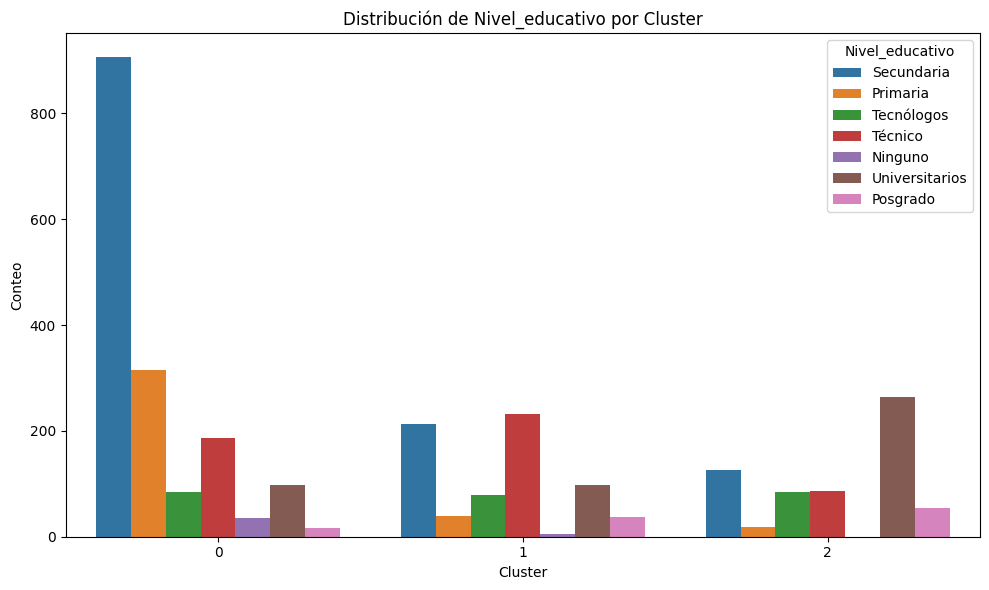

Distribución de Rango_ingresos por Cluster:
Rango_ingresos  < 250.000  > 1.000.001 < 1.500.000  > 1.500.001 < 2.000.000  \
Cluster                                                                       
0                     272                      225                      127   
1                      43                       88                      105   
2                      27                      163                       91   

Rango_ingresos  > 2.000.001 < 3.000.000  > 250.001 < 500.000  \
Cluster                                                        
0                                    76                  263   
1                                    91                   55   
2                                   126                   24   

Rango_ingresos  > 3.000.001 < 4.000.000  > 4.000.001 < 5.000.000  \
Cluster                                                            
0                                    37                       17   
1                                  

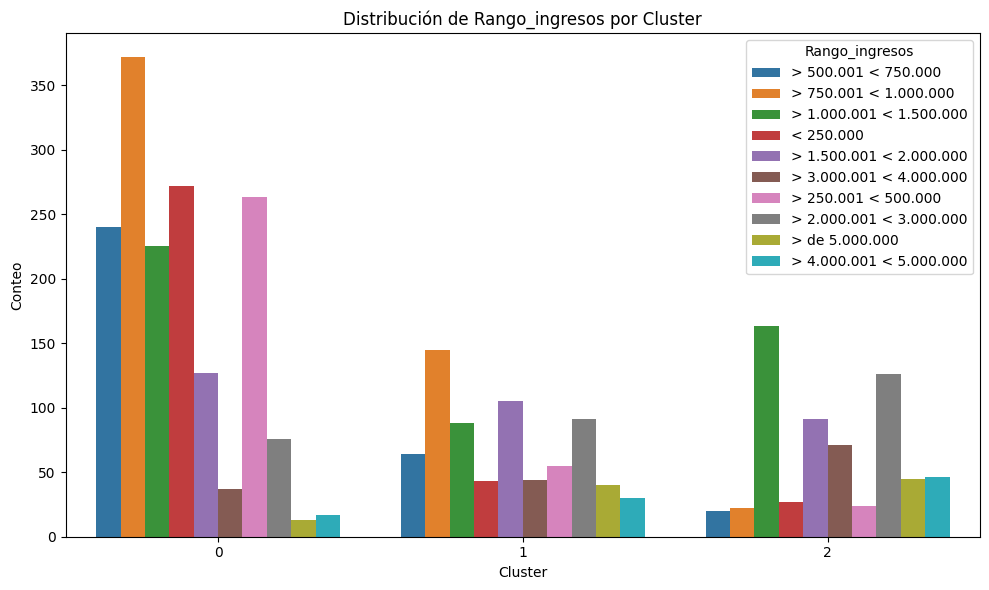

Distribución de Rango_edad por Cluster:
Rango_edad  18-25  26-35  36-45  46-55  > 56
Cluster                                     
0             380    347    359    295   261
1             278    163    131     78    55
2              55    277    113     98    92




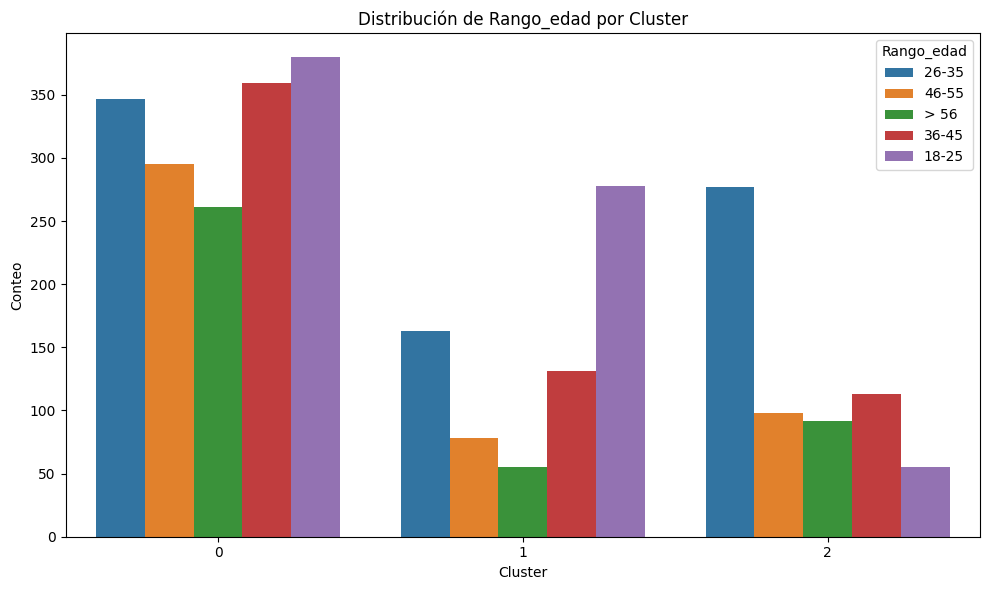

Distribución de Percepcion_riesgo_pago_PSE por Cluster:
Percepcion_riesgo_pago_PSE    1    2    3    4    5    6
Cluster                                                 
0                           627  138  169  147  189  372
1                           154   91  100   94   85  181
2                           182   98  107   98   75   75




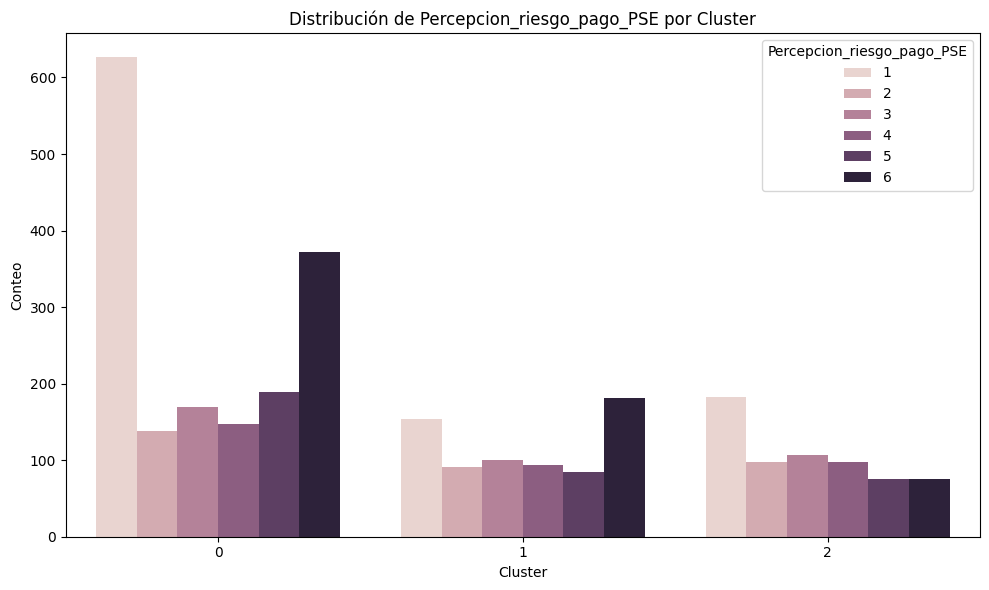

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que 'df_usuarios' es el DataFrame original con las variables categóricas y la columna 'Cluster'.

# 1. Analizar la distribución de algunas variables categóricas por Cluster
# Seleccionar algunas variables categóricas de interés
variables_categoricas = ['Nivel_educativo', 'Rango_ingresos', 'Rango_edad', 'Percepcion_riesgo_pago_PSE']

# Crear tablas de frecuencia para cada variable categórica y el Cluster
for variable in variables_categoricas:
    print(f"Distribución de {variable} por Cluster:")
    print(pd.crosstab(df_usuarios['Cluster'], df_usuarios[variable]))
    print("\n")

    # 2. Visualizar la distribución con gráficos de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_usuarios, x='Cluster', hue=variable)
    plt.title(f"Distribución de {variable} por Cluster")
    plt.xlabel('Cluster')
    plt.ylabel('Conteo')
    plt.legend(title=variable, bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()




##Reduccion de variables


In [ ]:
# Variables seleccionadas para un nuevo modelo de clustering
selected_variables = [
    'Uso_tecno_finan', 'Lugar_transferencia', 'Rango_edad', 'Nivel_educativo',
    'Percepcion_facilidad_PSE', 'Ubicación_cuenta_AH', 'Cuenta_Ahorro', 'Percepcion_facilidad_Efectivo',
    'Rango_ingresos', 'Fuente_Ingresos','Satisfaccion_APPS_finan','EstratoIMP','Entidad_queja','REGIÓN'
]

# Crear un DataFrame con estas variables seleccionadas
df_selected = df_usuarios[selected_variables]

# Aplicar K-Modes
k = 3
kmodes = KModes(n_clusters=k, init='Cao', n_init=10, verbose=1, random_state=42)
clusters = kmodes.fit_predict(df_selected)


# Agregar etiquetas de clúster al DataFrame original para análisis posteriores
df_selected['Cluster'] = clusters

# Evaluación del modelo con índice de silueta
digital_encoded = df_selected.apply(lambda x: pd.factorize(x)[0])
silhouette_avg = silhouette_score(digital_encoded, clusters, metric='hamming')
print(f'Silhouette Score: {silhouette_avg}')


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 589, cost: 20151.0
Run 1, iteration: 2/100, moves: 79, cost: 20151.0


<ipython-input-88-089553da87d2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = clusters


Silhouette Score: 0.1862599774933254


In [ ]:
# Función para calcular la distancia de coincidencia simple
def simple_matching_distance(row1, row2):
    return sum(row1 != row2)

# Calcular la cohesión intra-cluster
intra_cluster_distances = []
for cluster in range(k):
    cluster_data = df_selected[df_selected['Cluster'] == cluster].drop(columns=['Cluster'])
    if cluster_data.empty:
        print(f"El cluster {cluster} está vacío.")
        continue  # Saltar al siguiente cluster si no hay datos
    mode = cluster_data.mode().iloc[0]  # Modo del cluster
    distances = cluster_data.apply(lambda row: simple_matching_distance(row, mode), axis=1)
    intra_cluster_distances.append(distances.mean())

# Promedio de cohesión para todos los clusters
average_intra_cluster_distance = sum(intra_cluster_distances) / k
print("Cohesión promedio intra-cluster:", average_intra_cluster_distance)

Cohesión promedio intra-cluster: 6.77080456228375


In [ ]:
# Calcular la distancia de coincidencia simple entre modos de clusters
inter_cluster_distances = []
modes = [df_usuarios[df_usuarios['Cluster'] == cluster].drop(columns=['Cluster']).mode().iloc[0] for cluster in range(k)]

for mode1, mode2 in combinations(modes, 2):
    distance = simple_matching_distance(mode1, mode2)
    inter_cluster_distances.append(distance)

# Promedio de separación inter-cluster
average_inter_cluster_distance = sum(inter_cluster_distances) / len(inter_cluster_distances)
print("Separación promedio inter-cluster:", average_inter_cluster_distance)

Separación promedio inter-cluster: 12.333333333333334


In [ ]:
# Analizar la moda de las variables por cluster
cluster_summary = df_selected.groupby('Cluster').agg(lambda x: x.mode()[0])
print(cluster_summary)

        Uso_tecno_finan    Lugar_transferencia Rango_edad Nivel_educativo  \
Cluster                                                                     
0                    No  Corresponsal bancario      36-45      Secundaria   
1                    No      Cajero automático      18-25         Técnico   
2                    No  Corresponsal bancario      26-35  Universitarios   

         Percepcion_facilidad_PSE             Ubicación_cuenta_AH  \
Cluster                                                             
0                               1              No tiene Cuenta AH   
1                               6  Bancos o entidades financieras   
2                               5  Bancos o entidades financieras   

        Cuenta_Ahorro  Percepcion_facilidad_Efectivo           Rango_ingresos  \
Cluster                                                                         
0                  NO                              6    > 750.001 < 1.000.000   
1                  SÍ    

#SEGMENTACION USUARIOS QUE **NO** USAN MEDIOS DE PAGOS DIGITALES

## Modelado cluster

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 32739.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 372, cost: 31202.0
Run 1, iteration: 2/100, moves: 233, cost: 31202.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 408, cost: 30982.0
Run 1, iteration: 2/100, moves: 308, cost: 30721.0
Run 1, iteration: 3/100, moves: 17, cost: 30721.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 778, cost: 29335.0
Run 1, iteration: 2/10

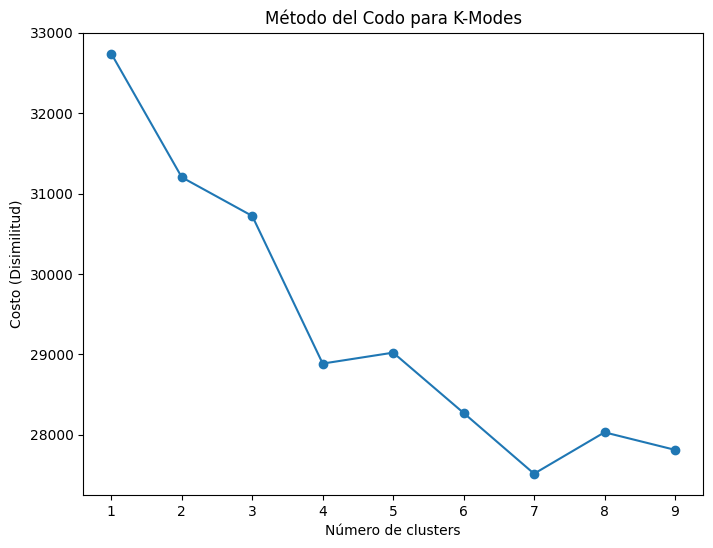

In [ ]:
# Método del Codo
costs = []
K = range(1, 10)

for num_clusters in K:
    kmodes = KModes(n_clusters=num_clusters, init='Cao', n_init=5, verbose=1)
    kmodes.fit_predict(df_no_usuarios)
    costs.append(kmodes.cost_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(K, costs, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Costo (Disimilitud)')
plt.title('Método del Codo para K-Modes')
plt.show()

In [ ]:
!pip install kmodes

from kmodes.kmodes import KModes
k= 2
# Initialize the KModes model with the desired number of clusters
kmodes_model  = KModes(n_clusters=k, init='Cao', n_init=2, verbose=1, random_state=42)

# Fit the model to your data
clusters = kmodes_model.fit_predict(df_no_usuarios)

# Costo del modelo (disimilitud total)
print(f"Costo del modelo: {kmodes.cost_}")

# Add the cluster labels to your DataFrame
df_no_usuarios['Cluster'] = clusters

# Print the cluster centroids
print(kmodes_model.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 323, cost: 31995.0
Run 1, iteration: 2/100, moves: 5, cost: 31995.0
Costo del modelo: 20151.0
[['No' 'No usa internet' 'Ninguna de las anteriores' '> 56' 'Secundaria'
  'WIFI' '1' 'No tiene Cuenta AH' 'NO' '6' '< 250.000' '1' 'Mensual'
  'Otros no identificados' '1' '1' '< 250.000' '1' '1' '1' '1' '1' 'Sí'
  'No se ha quejado' '1' 'Caribe' '0']
 ['No' 'Varias veces al día' 'Corresponsal bancario' '36-45' 'Secundaria'
  'WIFI' '1' 'No tiene Cuenta AH' 'NO' '6' '> 750.001 < 1.000.000' '6'
  'Irregulares' 'Otros no identificados' '1' '1' '> 500.001 < 750.000'
  '6' '6' '1' '1' '2' 'Sí' 'No se ha quejado' '6' 'Centro Oriente' '1']]


In [ ]:
# prompt: codigo para descargar la base df_usuarios con el cluster

from google.colab import files

# Suponiendo que df_usuarios ya está definido
df_no_usuarios.to_csv('df_no_usuarios.csv', encoding='utf-8-sig')
files.download('df_no_usuarios.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Metricas

### Grafico de la silueta

In [ ]:
# Calculate silhouette score as metric for cluster quality (approximation by assigning numeric encoding)
# Encode features as numeric labels for silhouette score calculation
digital_encoded_2 = df_no_usuarios.apply(lambda x: pd.factorize(x)[0])


digital_silhouette = silhouette_score(digital_encoded_2, clusters, metric='hamming')
print(f"El coeficiente de silueta promedio es: {digital_silhouette}")

El coeficiente de silueta promedio es: 0.14473927324379865


In [ ]:
# Función para calcular la distancia de coincidencia simple
def simple_matching_distance(row1, row2):
    return sum(row1 != row2)

# Calcular la cohesión intra-cluster
intra_cluster_distances = []
for cluster in range(k):
    cluster_data = df_no_usuarios[df_no_usuarios['Cluster'] == cluster].drop(columns=['Cluster'])
    mode = cluster_data.mode().iloc[0]  # Modo del cluster
    distances = cluster_data.apply(lambda row: simple_matching_distance(row, mode), axis=1)
    intra_cluster_distances.append(distances.mean())

# Promedio de cohesión para todos los clusters
average_intra_cluster_distance = sum(intra_cluster_distances) / k
print("Cohesión promedio intra-cluster:", average_intra_cluster_distance)

Cohesión promedio intra-cluster: 12.096786158096549


In [ ]:
from itertools import combinations

# Calcular la distancia de coincidencia simple entre modos de clusters
inter_cluster_distances = []
modes = [df_no_usuarios[df_no_usuarios['Cluster'] == cluster].drop(columns=['Cluster']).mode().iloc[0] for cluster in range(k)]

for mode1, mode2 in combinations(modes, 2):
    distance = simple_matching_distance(mode1, mode2)
    inter_cluster_distances.append(distance)

# Promedio de separación inter-cluster
average_inter_cluster_distance = sum(inter_cluster_distances) / len(inter_cluster_distances)
print("Separación promedio inter-cluster:", average_inter_cluster_distance)


Separación promedio inter-cluster: 10.0


### Entropia

In [ ]:
import pandas as pd
import numpy as np

# Asumiendo que 'df_no_usuarios' es tu DataFrame y ya contiene la columna 'Cluster'
# df_no_usuarios = pd.read_csv('ruta_a_tu_archivo.csv')  # Descomenta y ajusta si necesitas cargar tus datos

# Función para calcular la entropía de un clúster para todas las columnas categóricas
def calculate_total_entropy(df, cluster_label):
    cluster_data = df[df['Cluster'] == cluster_label]
    total_entropy = 0
    # Considerar todas las columnas excepto 'Cluster' y otras no categóricas que puedas tener
    for column in df.columns.drop(['Cluster']):
        counts = cluster_data[column].value_counts(normalize=True)
        entropy = -np.sum(counts * np.log2(counts + np.finfo(float).eps))  # Evitar log(0)
        total_entropy += entropy  # Sumar la entropía de cada columna para obtener la entropía total del clúster
    return total_entropy

# Calcular la entropía para cada clúster y almacenar los resultados
cluster_entropies = {}
clusters = df_no_usuarios['Cluster'].unique()
for cluster in clusters:
    cluster_entropies[cluster] = calculate_total_entropy(df_no_usuarios, cluster)

# Imprimir la entropía de cada clúster
for cluster, entropy in cluster_entropies.items():
    print(f"Entropía del Clúster {cluster}: {entropy}")


Entropía del Clúster 0: 46.531356018920555
Entropía del Clúster 1: 48.937616922580894


## Analisis cluster

In [ ]:
# Analizar la moda de las variables por cluster
cluster_summary = df_no_usuarios.groupby('Cluster').agg(lambda x: x.mode()[0])
print(cluster_summary)

        Uso_tecno_finan    Frec_uso_internet        Lugar_transferencia  \
Cluster                                                                   
0                    No  Varias veces al día  Ninguna de las anteriores   
1                    No      No usa internet           Empresa de giros   

        Rango_edad Nivel_educativo Metodo_uso_internet  \
Cluster                                                  
0             > 56      Secundaria                WIFI   
1             > 56      Secundaria        Sin internet   

         Percepcion_facilidad_PSE Ubicación_cuenta_AH Cuenta_Ahorro  \
Cluster                                                               
0                               1  No tiene Cuenta AH            NO   
1                               1  No tiene Cuenta AH            NO   

         Percepcion_facilidad_Efectivo  ...         Rango_gastos  \
Cluster                                 ...                        
0                                    6  ...  

Distribución de Nivel_educativo por Cluster:
Nivel_educativo  Ninguno  Posgrado  Primaria  Secundaria  Tecnólogos  Técnico  \
Cluster                                                                         
0                     37        15       310         683          40      107   
1                      9         2        92         292          16       45   
2                      2         1        32         129           7       29   
3                     68         0       407         138           6       23   

Nivel_educativo  Universitarios  
Cluster                          
0                            86  
1                            26  
2                            15  
3                            11  




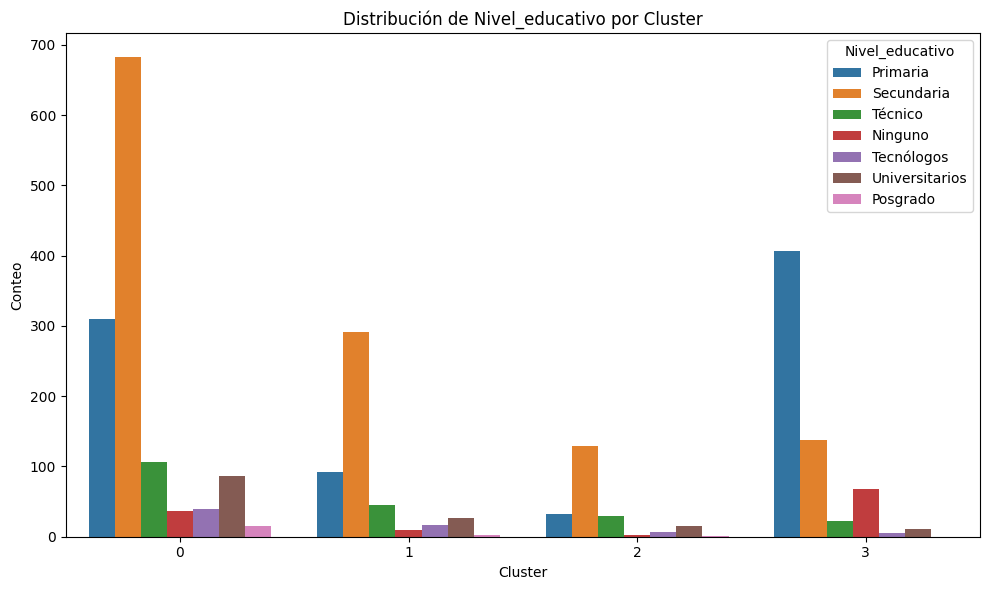

Distribución de Rango_ingresos por Cluster:
Rango_ingresos  < 250.000  > 1.000.001 < 1.500.000  > 1.500.001 < 2.000.000  \
Cluster                                                                       
0                     154                      169                      118   
1                     172                       60                       24   
2                      23                       42                       12   
3                     380                       26                       11   

Rango_ingresos  > 2.000.001 < 3.000.000  > 250.001 < 500.000  \
Cluster                                                        
0                                    65                  300   
1                                    12                   71   
2                                     7                   29   
3                                     6                   95   

Rango_ingresos  > 3.000.001 < 4.000.000  > 4.000.001 < 5.000.000  \
Cluster                     

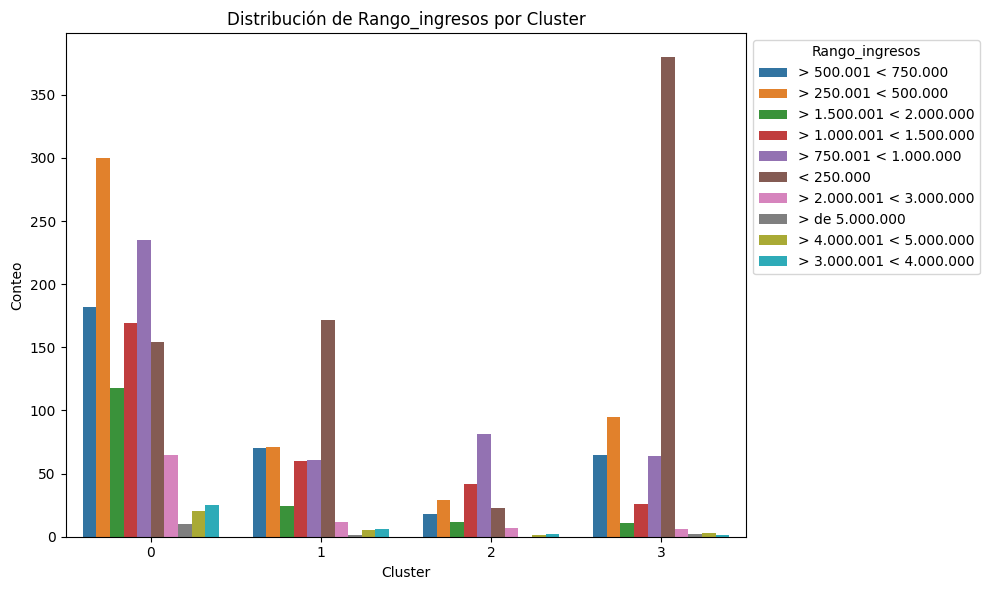

Distribución de Rango_edad por Cluster:
Rango_edad  18-25  26-35  36-45  46-55  > 56
Cluster                                     
0             169    159    192    240   518
1              81    136    101     87    77
2              43     33     84     33    22
3              39     38     67    125   384




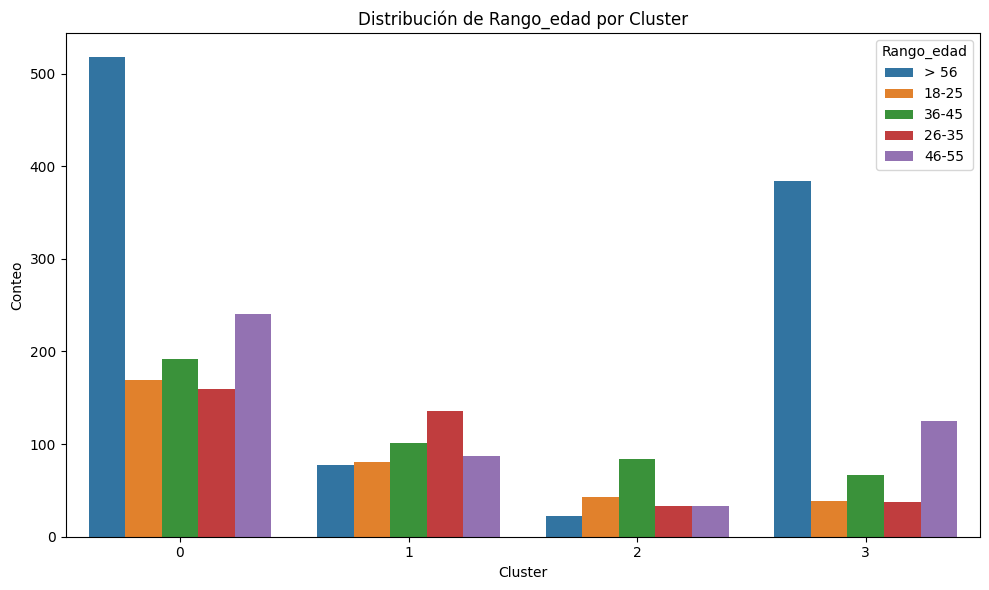

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que 'df_no_usuarios' es el DataFrame original con las variables categóricas y la columna 'Cluster'.

# 1. Analizar la distribución de algunas variables categóricas por cluster
# Seleccionar algunas variables categóricas de interés
variables_categoricas = ['Nivel_educativo', 'Rango_ingresos', 'Rango_edad']

# Crear tablas de frecuencia para cada variable categórica y el cluster
for variable in variables_categoricas:
    print(f"Distribución de {variable} por Cluster:")
    print(pd.crosstab(df_no_usuarios['Cluster'], df_no_usuarios[variable]))
    print("\n")

    # 2. Visualizar la distribución con gráficos de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_no_usuarios, x='Cluster', hue=variable)
    plt.title(f"Distribución de {variable} por Cluster")
    plt.xlabel('Cluster')
    plt.ylabel('Conteo')
    plt.legend(title=variable, bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()




## Reduccion de variables

In [ ]:
# Variables seleccionadas para un modelo de clustering refinado
selected_variables = [
    'EstratoIMP', 'Rango_edad', 'Percepcion_facilidad_PSE',
    'Frec_uso_internet', 'Lugar_transferencia', 'Rango_ingresos',
    'Percepcion_costos_monederos', 'Percepcion_costos_PSE', 'REGIÓN'
]

# Crear un DataFrame con estas variables seleccionadas
df_selected = df_no_usuarios[selected_variables]

# Aplicar K-Modes
k= 2
kmodes = KModes(n_clusters=k, init='Cao', n_init=10, verbose=1)
clusters = kmodes.fit_predict(df_selected)


# Agregar etiquetas de clúster al DataFrame original para análisis adicionales
df_selected['Cluster'] = clusters

# Evaluación del modelo con índice de silueta
digital_encoded = df_selected.apply(lambda x: pd.factorize(x)[0])
silhouette_avg = silhouette_score(digital_encoded, clusters, metric='hamming')
print(f'Silhouette Score: {silhouette_avg}')

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 12518.0


<ipython-input-97-6c0482c72286>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = clusters


Silhouette Score: 0.2244770274761399


In [ ]:
# Función para calcular la distancia de coincidencia simple
def simple_matching_distance(row1, row2):
    return sum(row1 != row2)

# Calcular la cohesión intra-cluster
intra_cluster_distances = []
for cluster in range(k):
    cluster_data = df_selected[df_selected['Cluster'] == cluster].drop(columns=['Cluster'])
    if cluster_data.empty:
        print(f"El cluster {cluster} está vacío.")
        continue  # Saltar al siguiente cluster si no hay datos
    mode = cluster_data.mode().iloc[0]  # Modo del cluster
    distances = cluster_data.apply(lambda row: simple_matching_distance(row, mode), axis=1)
    intra_cluster_distances.append(distances.mean())

# Promedio de cohesión para todos los clusters
average_intra_cluster_distance = sum(intra_cluster_distances) / k
print("Cohesión promedio intra-cluster:", average_intra_cluster_distance)

Cohesión promedio intra-cluster: 4.945187915816064


In [ ]:
# Calcular la distancia de coincidencia simple entre modos de clusters
inter_cluster_distances = []
modes = [df_usuarios[df_usuarios['Cluster'] == cluster].drop(columns=['Cluster']).mode().iloc[0] for cluster in range(k)]

for mode1, mode2 in combinations(modes, 2):
    distance = simple_matching_distance(mode1, mode2)
    inter_cluster_distances.append(distance)

# Promedio de separación inter-cluster
average_inter_cluster_distance = sum(inter_cluster_distances) / len(inter_cluster_distances)
print("Separación promedio inter-cluster:", average_inter_cluster_distance)

Separación promedio inter-cluster: 13.0


In [ ]:
# Analizar la moda de las variables por cluster
cluster_summary = df_no_usuarios.groupby('Cluster').agg(lambda x: x.mode()[0])
print(cluster_summary)

        Uso_tecno_finan    Frec_uso_internet        Lugar_transferencia  \
Cluster                                                                   
0                    No      No usa internet  Ninguna de las anteriores   
1                    No  Varias veces al día           Empresa de giros   
2                    No  Varias veces al día            punto de chance   
3                    No  Varias veces al día      Corresponsal bancario   

        Rango_edad Nivel_educativo Metodo_uso_internet  \
Cluster                                                  
0             > 56      Secundaria        Sin internet   
1            36-45      Secundaria                WIFI   
2            46-55      Secundaria                WIFI   
3             > 56      Secundaria                WIFI   

         Percepcion_facilidad_PSE Ubicación_cuenta_AH Cuenta_Ahorro  \
Cluster                                                               
0                               1  No tiene Cuenta AH     